In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import matplotlib
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib inline  

## Load shapefile

Download shapefile from http://geocommons.com/maps/315934/details

(this doesn't seem to work anymore - drop me an email at alina@gocardless.com and I can send the file)

In [2]:
uk_shp = '../Downloads/uk_regions_ukci/uk_regions_ukci.shp'

In [3]:
for region in Reader(uk_shp).records():
    print region.attributes['name_small']

Scotland
West Midlands
North East
Yorkshire and The Humber
North West
East
Wales
Northern Ireland
East Midlands
South East
South West
London


## Load dataset

Download dataset A01 (A01 Labour market statistics summary data tables) from http://www.ons.gov.uk/ons/publications/re-reference-tables.html?edition=tcm%3A77-378943	

I used the data on Sheet 18

In [4]:
regional_data = pd.read_csv('../Data Club/economically_active.csv')

In [5]:
regional_data.head()

,region,%_economically_active,%_deviation_from_avg
0,North East,74.64,-4.33
1,North West,75.78,-2.75
2,Yorkshire and The Humber,76.05,-2.39
3,East Midlands,78.80,1.18
4,West Midlands,75.76,-2.78


Merge data

In [6]:
attribute_dict = {region.attributes['name_small']: region.geometry for region in Reader(uk_shp).records()}
attribute_df = pd.DataFrame(attribute_dict.items(), columns=['region', 'shape'])
data = regional_data.merge(attribute_df, on='region')

In [7]:
data.head()

,region,%_economically_active,%_deviation_from_avg,shape
0,North East,74.64,-4.33,(POLYGON ((-0.792568627806217 54.5596256759249...
1,North West,75.78,-2.75,"(POLYGON ((-3.01008714885767 53.4386542436634,..."
2,Yorkshire and The Humber,76.05,-2.39,"(POLYGON ((-1.91106436265098 53.5386678907591,..."
3,East Midlands,78.80,1.18,(POLYGON ((-0.0328805042026595 52.661914566614...
4,West Midlands,75.76,-2.78,"(POLYGON ((-2.95603068940108 52.3496297113361,..."


Use a for loop to create an instance of the ShapelyFeature class for each row of the dataframe

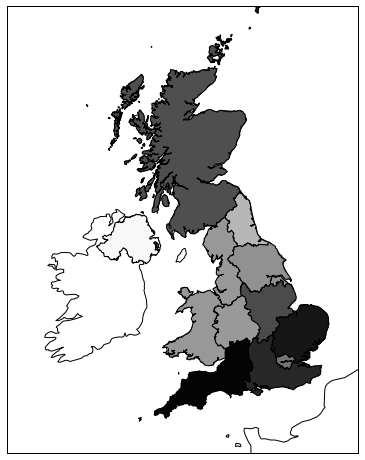

In [8]:
plt.figure(figsize=(8,8))

ax = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
ax.coastlines(resolution='50m')
ax.set_extent([-12, 3, 49, 60])

norm = matplotlib.colors.Normalize(vmin=-8, vmax=5)
cmap = plt.cm.gray_r

for i, region in data.iterrows():

    region_feature = ShapelyFeature(data['shape'][i],
                                    ccrs.PlateCarree(),
                                    facecolor=cmap(norm(data['%_deviation_from_avg'][i])), 
                                    )
    ax.add_feature(region_feature)